# Market efficiency tests

In [1]:
# Import dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

In [2]:
# Read the previously extracted financial data. 
#df = pd.read_csv("BTCUSD.csv")
#df = pd.read_csv("ETHUSD.csv")
#df = pd.read_csv("BNBUSD.csv")
#df = pd.read_csv("XRPUSD.csv")
#df = pd.read_csv("SOLUSD.csv")
#df = pd.read_csv("ADAUSD.csv")
#df = pd.read_csv("DOGEUSD.csv")
#df = pd.read_csv("DOTUSD.csv")
#df = pd.read_csv("SHIBUSD.csv")
df = pd.read_csv("AVAXUSD.csv")

df = df.head(650)

In [3]:
# Get the relevant information
df_prices = df[['Date','Close**']]
df_prices.columns = ['Date','Prices']
df_prices

,Date,Prices
0,"Jul 01, 2022",$16.09
1,"Jun 30, 2022",$16.93
2,"Jun 29, 2022",$17.60
3,"Jun 28, 2022",$18.12
4,"Jun 27, 2022",$19.32
...,...,...
643,"Sep 26, 2020",$4.54
644,"Sep 25, 2020",$4.71
645,"Sep 24, 2020",$4.57
646,"Sep 23, 2020",$4.12


In [4]:
# Reverse the data frame to have a proper chronological order. 
df_prices=df_prices.loc[::-1]
df_prices

,Date,Prices
647,"Sep 22, 2020",$5.23
646,"Sep 23, 2020",$4.12
645,"Sep 24, 2020",$4.57
644,"Sep 25, 2020",$4.71
643,"Sep 26, 2020",$4.54
...,...,...
4,"Jun 27, 2022",$19.32
3,"Jun 28, 2022",$18.12
2,"Jun 29, 2022",$17.60
1,"Jun 30, 2022",$16.93


In [5]:
# Set the date as index to process each day. 
df_prices.set_index(['Date'], inplace=True)
df_prices

,Prices
Date,
"Sep 22, 2020",$5.23
"Sep 23, 2020",$4.12
"Sep 24, 2020",$4.57
"Sep 25, 2020",$4.71
"Sep 26, 2020",$4.54
...,...
"Jun 27, 2022",$19.32
"Jun 28, 2022",$18.12
"Jun 29, 2022",$17.60


In [6]:
# Get rid of the commas & dollar signs. 
df_prices['Prices'] = df_prices['Prices'].str.replace('$', '')
df_prices['Prices'] = df_prices['Prices'].str.replace(',', '')
df_prices

<ipython-input-6-c2832261f6f6>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_prices['Prices'] = df_prices['Prices'].str.replace('$', '')
<ipython-input-6-c2832261f6f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['Prices'] = df_prices['Prices'].str.replace('$', '')
<ipython-input-6-c2832261f6f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Prices
Date,
"Sep 22, 2020",5.23
"Sep 23, 2020",4.12
"Sep 24, 2020",4.57
"Sep 25, 2020",4.71
"Sep 26, 2020",4.54
...,...
"Jun 27, 2022",19.32
"Jun 28, 2022",18.12
"Jun 29, 2022",17.60


In [7]:
# Convert the data to float. 
df_prices['Prices'] = df_prices['Prices'].astype(float)
df_prices['Prices']

<ipython-input-7-e4dcad7b2e19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['Prices'] = df_prices['Prices'].astype(float)


Date
Sep 22, 2020     5.23
Sep 23, 2020     4.12
Sep 24, 2020     4.57
Sep 25, 2020     4.71
Sep 26, 2020     4.54
                ...  
Jun 27, 2022    19.32
Jun 28, 2022    18.12
Jun 29, 2022    17.60
Jun 30, 2022    16.93
Jul 01, 2022    16.09
Name: Prices, Length: 648, dtype: float64

In [8]:
# Calculate the returns on a daily basis. 
df_prices['Returns'] = df_prices['Prices'].pct_change()
df_prices

,Prices,Returns
Date,,
"Sep 22, 2020",5.23,NaN
"Sep 23, 2020",4.12,-0.212237
"Sep 24, 2020",4.57,0.109223
"Sep 25, 2020",4.71,0.030635
"Sep 26, 2020",4.54,-0.036093
...,...,...
"Jun 27, 2022",19.32,-0.018791
"Jun 28, 2022",18.12,-0.062112
"Jun 29, 2022",17.60,-0.028698


In [9]:
# Calculate the log prices on a daily basis. 
df_prices['LogPrices'] = np.log(df_prices['Prices'])
df_prices

,Prices,Returns,LogPrices
Date,,,
"Sep 22, 2020",5.23,NaN,1.654411
"Sep 23, 2020",4.12,-0.212237,1.415853
"Sep 24, 2020",4.57,0.109223,1.519513
"Sep 25, 2020",4.71,0.030635,1.549688
"Sep 26, 2020",4.54,-0.036093,1.512927
...,...,...,...
"Jun 27, 2022",19.32,-0.018791,2.961141
"Jun 28, 2022",18.12,-0.062112,2.897016
"Jun 29, 2022",17.60,-0.028698,2.867899


In [10]:
df_prices[['Returns']].max()

Returns    0.75
dtype: float64

In [11]:
df_prices[['Returns']].min()

Returns   -0.365019
dtype: float64

In [12]:
# Calculate the log returns on a daily basis. 
df_prices['LogReturns'] = np.log(df_prices.Prices) - np.log(df_prices.Prices.shift(1))
# Drop the first row since it will not produce a meaningful return value.
df_prices.dropna(inplace=True)
df_prices

,Prices,Returns,LogPrices,LogReturns
Date,,,,
"Sep 23, 2020",4.12,-0.212237,1.415853,-0.238558
"Sep 24, 2020",4.57,0.109223,1.519513,0.103660
"Sep 25, 2020",4.71,0.030635,1.549688,0.030175
"Sep 26, 2020",4.54,-0.036093,1.512927,-0.036761
"Sep 27, 2020",4.63,0.019824,1.532557,0.019630
...,...,...,...,...
"Jun 27, 2022",19.32,-0.018791,2.961141,-0.018970
"Jun 28, 2022",18.12,-0.062112,2.897016,-0.064125
"Jun 29, 2022",17.60,-0.028698,2.867899,-0.029117


In [13]:
# Describe the dataframe to have an idea on its properties and distribution. 
df_prices.describe()

,Prices,Returns,LogPrices,LogReturns
count,647.000000,647.000000,647.000000,647.000000
mean,42.047110,0.005142,3.264379,0.001737
std,33.904694,0.084759,1.113731,0.081847
min,2.910000,-0.365019,1.068153,-0.454160
25%,12.535000,-0.044523,2.528525,-0.045545
50%,30.730000,0.000435,3.425239,0.000435
75%,70.035000,0.044165,4.248995,0.043217
max,134.530000,0.750000,4.901787,0.559616


# Lo MacKinlay Test

In [14]:
# Calculate the daily return variance and the number of days (corresponds to n in the formula). 
number_of_days = len(df_prices)
print('Number of days:',number_of_days)
variance_single_day = df_prices['LogReturns'].var()
variance_single_day

Number of days: 647


0.006698870733542406

In [15]:
# Try calculating variance ratio for 2,4,8,16,32,64 days. 
return_day_counts=[2,4,8,16,32,64]
return_day_counts

[2, 4, 8, 16, 32, 64]

## Homoscedasticity assumption

In [16]:
# Calculate variance ratio, asymptotic variance, standard error, M1 test statistics, z_stat and p_value
# under the assumption of homoscedasticity. 
Lo_MacKinlay_test_parameters = pd.DataFrame()
for day_count_k in return_day_counts:
    # Calculate the variance for the k-day return values. 
    day_count_variance = df_prices['LogReturns'].rolling(day_count_k).sum().var()
    # Calculate the variance ratio. 
    variance_ratio = day_count_variance/(variance_single_day*day_count_k)
    # Calculate the asymptotic variance and standard error to find the M1 stats value. 
    asymptotic_variance = (2 * (2 * day_count_k - 1) * (day_count_k - 1)/(3 * day_count_k * number_of_days))
    standard_error = asymptotic_variance **(1/2)
    # Calculate the M1(r) stats value. 
    m1_test_stat = (variance_ratio-1)
    
    # Calculate z-stat value. 
    z1_stat = m1_test_stat/standard_error
    
    # Calculate p value from the z1_stat value. 
    p1_value = 2*(1 - sps.norm.cdf(abs(z1_stat)))
    
    Lo_MacKinlay_test_parameters[day_count_k] = [variance_single_day,
                                          day_count_variance,
                                          variance_ratio,
                                          asymptotic_variance,
                                          standard_error,
                                          z1_stat,
                                          p1_value]

In [17]:
Lo_MacKinlay_test_parameters.set_axis(['var_0', 
                                       'var_k', 
                                       'variance_ratio', 
                                       'asymptotic_variance', 
                                       'standard_error',
                                       'z1_stat', 
                                       'p1_value'], 
                                      inplace=True)
Lo_MacKinlay_test_parameters

,2,4,8,16,32,64
var_0,0.006699,0.006699,0.006699,0.006699,0.006699,0.006699
var_k,0.013331,0.029615,0.067661,0.158285,0.364807,0.919695
variance_ratio,0.995043,1.105215,1.262553,1.476784,1.701811,2.145172
asymptotic_variance,0.001546,0.005410,0.013524,0.029946,0.062886,0.128816
standard_error,0.039314,0.073550,0.116293,0.173049,0.250772,0.358909
z1_stat,-0.126087,1.430526,2.257696,2.755199,2.798607,3.190703
p1_value,0.899663,0.152566,0.023965,0.005866,0.005132,0.001419


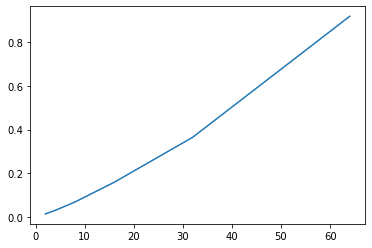

In [18]:
# Print variance values for each day count (2,4,8,16 etc.). 
plt.plot(Lo_MacKinlay_test_parameters.loc['var_k'])

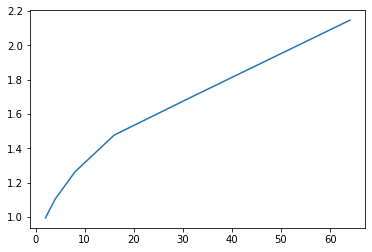

In [19]:
# Print variance_ratio values for each day count. 
plt.plot(Lo_MacKinlay_test_parameters.loc['variance_ratio'])

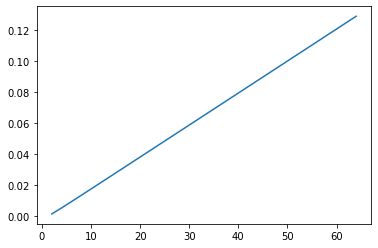

In [20]:
# Print asymptotic variance values for each day count.
plt.plot(Lo_MacKinlay_test_parameters.loc['asymptotic_variance'])

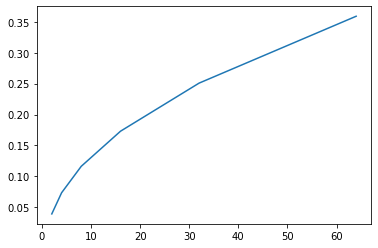

In [21]:
# Print standard error values for each day count.
plt.plot(Lo_MacKinlay_test_parameters.loc['standard_error'])

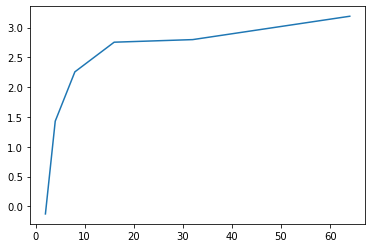

In [22]:
# Print Z statistics value for each day count.
plt.plot(Lo_MacKinlay_test_parameters.loc['z1_stat'])

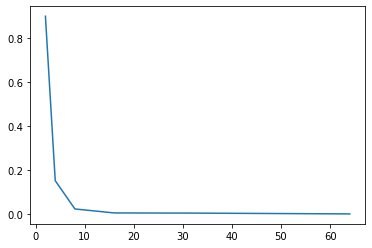

In [23]:
# Print p value for each day count.
plt.plot(Lo_MacKinlay_test_parameters.loc['p1_value'])

### Chow-Denning Test

In [24]:
# Apply Chow-Denning test 
min_p_value = min(Lo_MacKinlay_test_parameters.iloc[6])
max_z_stat = Lo_MacKinlay_test_parameters.iloc[5][Lo_MacKinlay_test_parameters.iloc[6] == min_p_value].values[0]
Chow_Denning = 1 - (1 - min_p_value)**(return_day_counts[-1])
if Chow_Denning > 0.1:
    print('The market is efficient')
elif max_z_stat > 0:
    print('The market is trending')
else:
    print('The market is mean-reverting')

The market is trending


## Heteroscedasticity assumption

In [25]:
'''
Define a function to calculate the denominator for the heteroscedasticity assumption formula. 
    input df: The financial data frame
'''
def calculate_delta_denom(df):
    # Calculate the mean return. 
    mean = df['LogReturns'].mean()
    
    # Calculate diff values. 
    diffed_df = df['LogPrices'].diff().dropna()
    
    # Subtract the mean. 
    diffed_df.sub(mean)
    
    # Take the square. 
    sq_df = diffed_df ** 2
    
    # Sum and square again. 
    df_sum = sq_df.sum()
    
    result = df_sum ** 2
    
    return result

calculate_delta_denom(df_prices)

18.254362604382703

In [26]:
'''
Define a function to calculate the nominator for the heteroscedasticity assumption formula. 
    input df: The financial data frame
    input j: The middle stage parameter of 'j' number of days. 
'''
def calculate_delta_nom(df,j):
    # Create a copy of the input dataframe to prevent overwrite. 
    df_copy = df.copy()
    
    # Calculate the mean return. 
    mean = df_copy['LogReturns'].mean()
    
    ## Calculate the first part. 
    
    # Shift the dataframe by -j to start calculating from the jth row. 
    first_df=df_copy.shift(-j)
    
    # Get the log_diff/log_return (starting with Xj+1 - Xj) values. 
    diffed_df = first_df['LogReturns']
    
    # Subtract the mean. 
    diffed_df.sub(mean)
    
    # Take the square. 
    sq_df_1 = diffed_df ** 2
    
    ## Calculate the second part. 
    
    second_df=df_copy
    
    # Get the log_diff/log_return (starting with X1 - X0) values. 
    diffed_df = second_df['LogReturns']
    
    # Subtract the mean. 
    diffed_df.sub(mean)
    
    # Take the square. 
    sq_df_2 = diffed_df ** 2
    
    # Multiply the squared dataframes. 
    result_df = sq_df_1 * sq_df_2
    
    # Drop the NA values and take its sum. 
    
    # Sum the resulting df. 
    result = result_df.dropna().sum()
    
    return result

calculate_delta_nom(df_prices,2)

0.05410153777868506

In [27]:
'''
Define a function to calculate the delta value for the heteroscedasticity assumption formula. 
    input df: The financial data frame
    input j: The middle stage parameter of 'j' number of days. 
'''
def calculate_delta(df,j):
    # Calculate the nominator. 
    nom = calculate_delta_nom(df,j)
    # Calculate the denominator. 
    denom = calculate_delta_denom(df)
    
    result = nom/denom
    
    return result

calculate_delta(df_prices,1)

0.002350372370113517

In [28]:
''' 
Define a function to calculate the phi (heteroscedasticity-consistent estimator of k) 
value for the heteroscedasticity assumption formula. 
    input df: The financial data frame
    input k: The aggregation parameter of 'k' number of days. 
'''
def calculate_phi(df,k):
    result = 0
    # Loop for k:
    for j in range(1,k):
        value = ( (4*((k-j)**2) )/(k**2) ) * calculate_delta(df,j)
        result += value
    
    return result

calculate_phi(df_prices,4)

0.009161030483744427

In [29]:
# Calculate variance ratio, asymptotic variance, standard error, M2 test statistics, z_stat and p_value
# under the assumption of heteroscedasticity. 
Lo_MacKinlay_test_parameters = pd.DataFrame()
for day_count_k in return_day_counts:
    # Calculate the variance for the k-day return values. 
    day_count_variance = df_prices['LogReturns'].rolling(day_count_k).sum().var()
    # Calculate the variance ratio. 
    variance_ratio = day_count_variance/(variance_single_day*day_count_k)
    # Calculate the M2(r) stats value. 
    m2_test_stat = (variance_ratio-1)
    
    # Calculate phi. 
    phi = calculate_phi(df_prices,day_count_k)
    
    # Calculate the z-stat, Lo & MacKinlay test statistic for given aggregation parameters. 
    z2_stat = m2_test_stat/(phi**0.5)
    
    # Calculate p value from the z2_stat value. 
    p2_value = 2*(1 - sps.norm.cdf(abs(z2_stat)))
    
    Lo_MacKinlay_test_parameters[day_count_k] = [variance_single_day,
                                                 day_count_variance,
                                                 variance_ratio,
                                                 phi,
                                                 z2_stat,
                                                 p2_value]

In [30]:
Lo_MacKinlay_test_parameters.set_axis(['var_0', 
                                       'var_k', 
                                       'variance_ratio', 
                                       'phi',
                                       'z2_stat', 
                                       'p2_value'], 
                                      inplace=True)
Lo_MacKinlay_test_parameters

,2,4,8,16,32,64
var_0,0.006699,0.006699,0.006699,0.006699,0.006699,0.006699
var_k,0.013331,0.029615,0.067661,0.158285,0.364807,0.919695
variance_ratio,0.995043,1.105215,1.262553,1.476784,1.701811,2.145172
phi,0.002350,0.009161,0.023942,0.048324,0.089084,0.165260
z2_stat,-0.102246,1.099273,1.696839,2.168902,2.351361,2.816997
p2_value,0.918561,0.271649,0.089727,0.030090,0.018705,0.004847


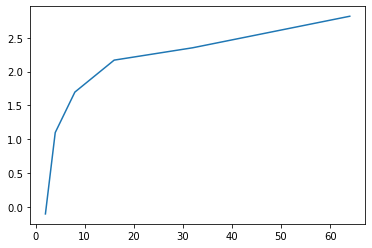

In [31]:
# Print Z statistics value for each day count.
plt.plot(Lo_MacKinlay_test_parameters.loc['z2_stat'])

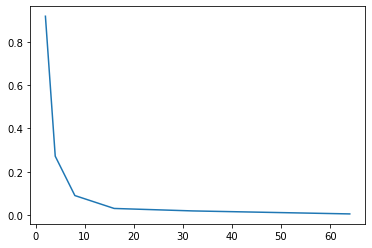

In [32]:
# Print p value for each day count.
plt.plot(Lo_MacKinlay_test_parameters.loc['p2_value'])

### Chow-Denning Test

In [33]:
# Apply Chow-Denning test 
min_p_value = min(Lo_MacKinlay_test_parameters.iloc[5])
max_z_stat = Lo_MacKinlay_test_parameters.iloc[4][Lo_MacKinlay_test_parameters.iloc[5] == min_p_value].values[0]
Chow_Denning = 1 - (1 - min_p_value)**(return_day_counts[-1])
if Chow_Denning > 0.1:
    print('The market is efficient')
elif max_z_stat > 0:
    print('The market is trending')
else:
    print('The market is mean-reverting')

The market is efficient


In [34]:
### 